In [1]:
import tensorflow as tf
from tensorflow.keras.datasets import fashion_mnist

In [2]:
dir(fashion_mnist)

['__builtins__',
 '__cached__',
 '__doc__',
 '__file__',
 '__loader__',
 '__name__',
 '__package__',
 '__path__',
 '__spec__',
 '_sys',
 'load_data']

In [2]:
(train_data, train_labels), (test_data, test_labels) = fashion_mnist.load_data()

In [3]:
# Creating a list to make the labels in human readable form
class_names = ["T-shirt/top", "Trouser", "Pullover", "Dress", "Coat", "Sandal", "Shirt", "Sneaker", "Bag", "Ankle Boot"]

In [5]:
import matplotlib.pyplot as plt
plt.rcParams['figure.dpi'] = 150

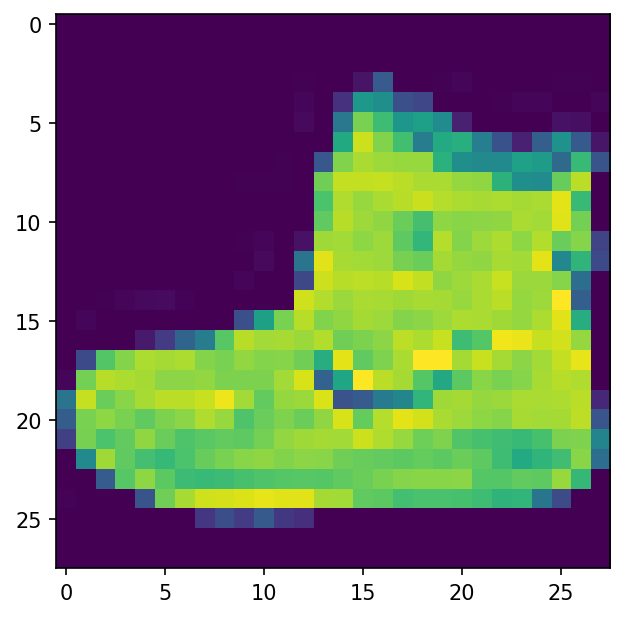

In [6]:
plt.imshow(train_data[0]);

In [7]:
class_names[train_labels[0]]

'Ankle Boot'

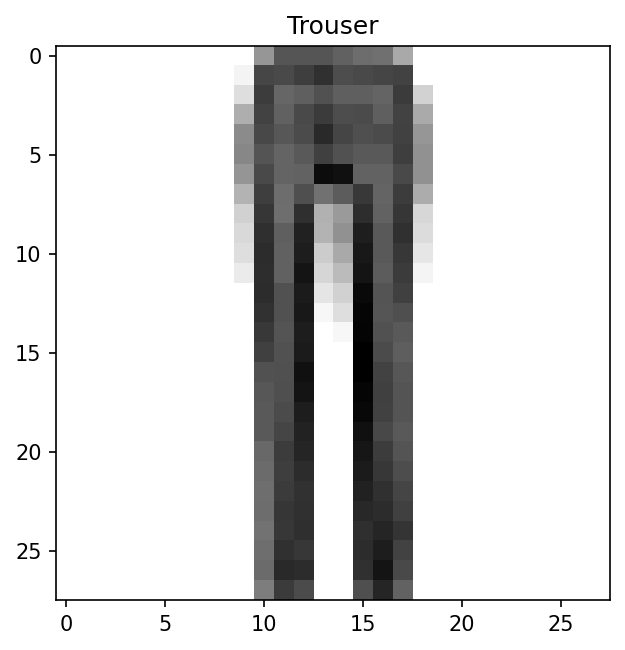

In [8]:
plt.imshow(train_data[69], cmap=plt.cm.binary)
plt.title(class_names[train_labels[69]]);

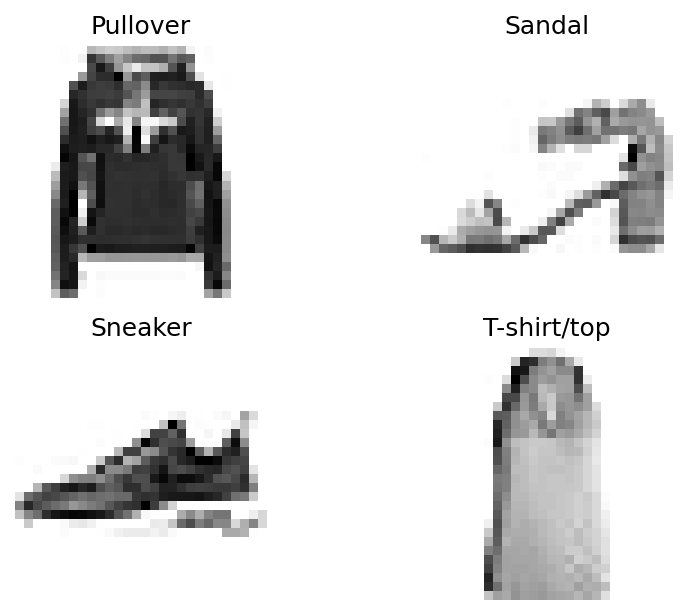

In [9]:
# Plotting multiple random images from the MNIST dataset
import random

for i in range(4):
    ax = plt.subplot(2, 2, i+1)
    random_value = random.choice(range(len(train_data)))
    ax.imshow(train_data[random_value], cmap=plt.cm.binary)
    plt.title(class_names[train_labels[random_value]])
    plt.axis(False)

## Making Our First Model for Multi-Class Classification

For the multi-class classification model, we can use a similar architecture as the binary classification model but it has to have some minor changes.
- Input Shape - **28 x 28**
- Output Shape - **10** (One Per class of clothing)
- Loss Function - `CategoricalCrossEntropy` or `tf.keras.losses.CategoricalCrossEntropy()`
    - If your labels are _OneHot Encoded_ then use `CategorialCrossentropy()`
    - If your labels are not _OneHot Encoded_ then use `SparseCategorialCrossentropy()`
- Output Layer Activation - **Softmax**

In [4]:
train_data[0].shape, train_labels[0].shape

((28, 28), ())

In [5]:
model_1 = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28, 28)),
    tf.keras.layers.Dense(4, activation="relu"),
    tf.keras.layers.Dense(4, activation="relu"),
    tf.keras.layers.Dense(10, activation="softmax")
])

model_1.compile(
    optimizer="Adam",
    loss=tf.keras.losses.SparseCategoricalCrossentropy(),
    metrics=["accuracy"]
)

history_1 = model_1.fit(train_data,
                        train_labels,
                        epochs=10,
                        validation_data=(test_data, test_labels))

Epoch 1/10
1875/1875 [==============================] - 4s 2ms/step - loss: 2.4599 - accuracy: 0.1102 - val_loss: 2.2691 - val_accuracy: 0.1155
Epoch 2/10
1875/1875 [==============================] - 4s 2ms/step - loss: 2.2468 - accuracy: 0.1241 - val_loss: 2.2293 - val_accuracy: 0.1313
Epoch 3/10
1875/1875 [==============================] - 4s 2ms/step - loss: 2.2191 - accuracy: 0.1361 - val_loss: 2.2084 - val_accuracy: 0.1399
Epoch 4/10
1875/1875 [==============================] - 4s 2ms/step - loss: 2.0206 - accuracy: 0.1820 - val_loss: 1.8339 - val_accuracy: 0.1881
Epoch 5/10
1875/1875 [==============================] - 4s 2ms/step - loss: 1.7648 - accuracy: 0.2344 - val_loss: 1.7194 - val_accuracy: 0.2551
Epoch 6/10
1875/1875 [==============================] - 4s 2ms/step - loss: 1.6689 - accuracy: 0.2859 - val_loss: 1.6190 - val_accuracy: 0.3052
Epoch 7/10
1875/1875 [==============================] - 4s 2ms/step - loss: 1.6299 - accuracy: 0.2909 - val_loss: 1.5921 - val_accuracy:

In [12]:
model_1.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense (Dense)               (None, 4)                 3140      
                                                                 
 dense_1 (Dense)             (None, 4)                 20        
                                                                 
 dense_2 (Dense)             (None, 10)                50        
                                                                 
Total params: 3,210
Trainable params: 3,210
Non-trainable params: 0
_________________________________________________________________


## Concept of Scaling or Normalization
- Neural networks prefer when the data that they get is in _normalized_ or _scaled_ form. 
- This means that the **min** and **max** values in the data have to be between **_0_** and **_1_**
- In order to normalize or scale our data, we can simply divide it by the maximum value

In [13]:
train_data.min(), train_data.max()

(0, 255)

In [5]:
# Dividing by the max value
train_data_norm = train_data / 255.0
test_data_norm = test_data / 255.0

# Checking the min and max value of new data
train_data_norm.min(), train_data_norm.max()

(0.0, 1.0)

In [16]:
# Building a model based on the normal data

model_2 = tf.keras.Sequential([
  tf.keras.layers.Flatten(input_shape=(28, 28)),
  tf.keras.layers.Dense(4, activation="relu"),
  tf.keras.layers.Dense(4, activation="relu"),
  tf.keras.layers.Dense(10, activation="softmax")
])

model_2.compile(
  optimizer=tf.keras.optimizers.Adam(),
  loss=tf.keras.losses.CategoricalCrossentropy(),
  metrics=["accuracy"]
)

history_2 = model_2.fit(train_data_norm,
            tf.one_hot(train_labels, depth=10),
            epochs=10,
            validation_data=(test_data_norm, tf.one_hot(test_labels, depth=10)),
)

Epoch 1/10
1875/1875 [==============================] - 4s 2ms/step - loss: 1.2170 - accuracy: 0.5438 - val_loss: 0.7842 - val_accuracy: 0.7201
Epoch 2/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.6739 - accuracy: 0.7556 - val_loss: 0.6524 - val_accuracy: 0.7621
Epoch 3/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.6156 - accuracy: 0.7813 - val_loss: 0.6260 - val_accuracy: 0.7755
Epoch 4/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.5946 - accuracy: 0.7931 - val_loss: 0.6128 - val_accuracy: 0.7877
Epoch 5/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.5817 - accuracy: 0.8007 - val_loss: 0.6038 - val_accuracy: 0.7894
Epoch 6/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.5683 - accuracy: 0.8054 - val_loss: 0.6115 - val_accuracy: 0.7902
Epoch 7/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.5601 - accuracy: 0.8087 - val_loss: 0.5884 - val_accuracy:

> Neural Networks tend to prefer data in normalized form and numerical form (between 0 and 1)

In [20]:
import pandas as pd
import matplotlib.pyplot as plt
plt.rcParams['figure.dpi'] = 150

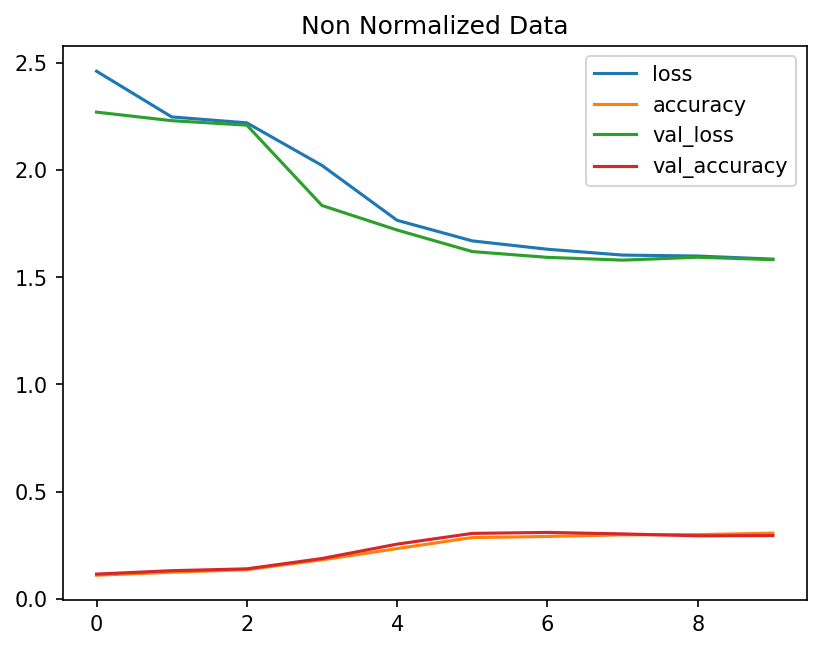

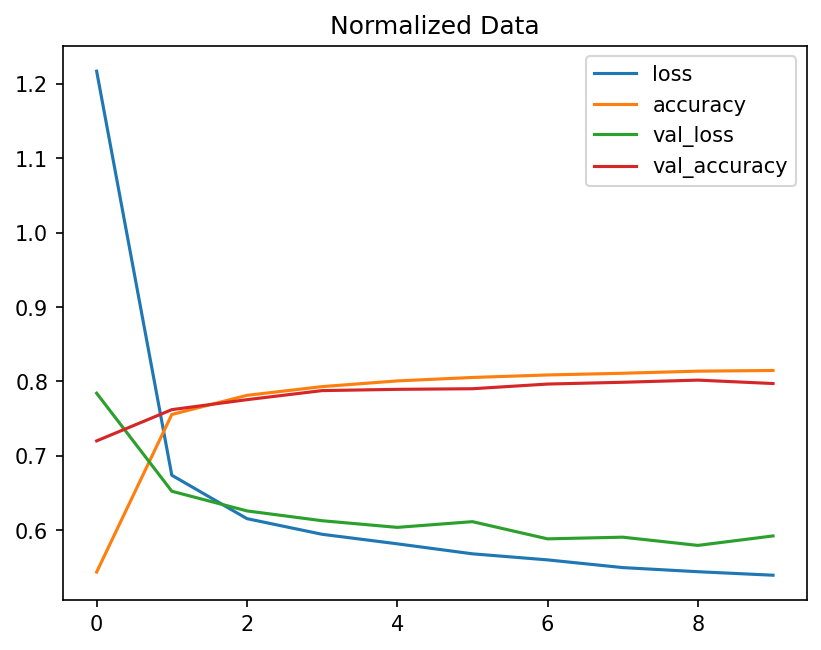

In [24]:
pd.DataFrame(history_1.history).plot(title="Non Normalized Data")
pd.DataFrame(history_2.history).plot(title="Normalized Data")
plt.show()

## Finding The Ideal Learning Rate

In [26]:
# Building a model based on the normal data

model_3 = tf.keras.Sequential([
  tf.keras.layers.Flatten(input_shape=(28, 28)),
  tf.keras.layers.Dense(4, activation="relu"),
  tf.keras.layers.Dense(4, activation="relu"),
  tf.keras.layers.Dense(10, activation="softmax")
])

model_3.compile(
  optimizer=tf.keras.optimizers.Adam(),
  loss=tf.keras.losses.CategoricalCrossentropy(),
  metrics=["accuracy"]
)

lr_scheduler = tf.keras.callbacks.LearningRateScheduler(lambda epoch: 1e-3 * 10 ** (epoch/20))

history_3 = model_3.fit(train_data_norm,
            tf.one_hot(train_labels, depth=10),
            epochs=40,
            validation_data=(test_data_norm, tf.one_hot(test_labels, depth=10)),
            callbacks=[lr_scheduler]
)

Epoch 1/40
1875/1875 [==============================] - 4s 2ms/step - loss: 1.2121 - accuracy: 0.5456 - val_loss: 0.9238 - val_accuracy: 0.6554 - lr: 0.0010
Epoch 2/40
1875/1875 [==============================] - 4s 2ms/step - loss: 0.8454 - accuracy: 0.6897 - val_loss: 0.8069 - val_accuracy: 0.7113 - lr: 0.0011
Epoch 3/40
1875/1875 [==============================] - 4s 2ms/step - loss: 0.7812 - accuracy: 0.7162 - val_loss: 0.8032 - val_accuracy: 0.7003 - lr: 0.0013
Epoch 4/40
1875/1875 [==============================] - 4s 2ms/step - loss: 0.7587 - accuracy: 0.7214 - val_loss: 0.7659 - val_accuracy: 0.7198 - lr: 0.0014
Epoch 5/40
1875/1875 [==============================] - 3s 2ms/step - loss: 0.7477 - accuracy: 0.7254 - val_loss: 0.7573 - val_accuracy: 0.7316 - lr: 0.0016
Epoch 6/40
1875/1875 [==============================] - 3s 2ms/step - loss: 0.7386 - accuracy: 0.7277 - val_loss: 0.7495 - val_accuracy: 0.7328 - lr: 0.0018
Epoch 7/40
1875/1875 [==============================] - 4s

> Ideal learning rate is around **0.001**

In [6]:
# Re-Fitting our model with the ideal learning rate

model_4 = tf.keras.Sequential([
  tf.keras.layers.Flatten(input_shape=(28, 28)),
  tf.keras.layers.Dense(4, activation="relu"),
  tf.keras.layers.Dense(4, activation="relu"),
  tf.keras.layers.Dense(10, activation="softmax")
])

model_4.compile(
  optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
  loss=tf.keras.losses.SparseCategoricalCrossentropy(),
  metrics=['accuracy']
)

model_4.fit(train_data_norm, train_labels, validation_data=(test_data_norm, test_labels), epochs=40, verbose=0)

## Evaluating the multi-class classification model

To evaluate a multi-class classification model, we can:
1. Evaluate it using other classification metrics (like confusion matrix)
2. Assess some of its predictions (through visualizations)
3. Improve its results (by training it for longer or changing the architecture of model)

### Creating and Visualizing The Predictions Through **Confusion Matrix**

In [31]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt
plt.rcParams['figure.dpi'] = 150

In [17]:
y_probs = model_4.predict(test_data_norm) # The predict() method will return probabilities

y_probs[:5]

313/313 [==============================] - 1s 2ms/step


array([[2.18017180e-06, 9.58042201e-10, 2.14438245e-10, 4.75458626e-04,
        1.31506383e-07, 1.68979436e-01, 4.10184788e-04, 9.10384953e-02,
        2.31290942e-05, 7.39070952e-01],
       [2.35332921e-02, 1.63954298e-03, 7.84210503e-01, 3.90021224e-03,
        7.09756017e-02, 5.07505843e-04, 1.08061656e-01, 6.12654767e-05,
        7.10699428e-03, 3.35377990e-06],
       [1.34767276e-06, 9.98400509e-01, 1.02675327e-10, 1.59755489e-03,
        2.67429834e-09, 1.31480959e-09, 2.02579820e-09, 1.38737670e-08,
        5.37631308e-07, 1.66369252e-09],
       [7.83157290e-08, 9.99081969e-01, 8.85706385e-13, 9.17870668e-04,
        2.08067494e-10, 3.66244007e-10, 7.59165161e-11, 2.78769541e-09,
        1.70580527e-08, 1.98766092e-09],
       [1.15573764e-01, 4.20739116e-06, 2.10755855e-01, 2.13052351e-02,
        9.60508958e-02, 1.75151214e-07, 5.54928124e-01, 2.57943349e-04,
        1.12143671e-03, 2.40730196e-06]], dtype=float32)

In [18]:
y_probs[0], tf.argmax(y_probs[0]), class_names[tf.argmax(y_probs[0])]

(array([2.1801718e-06, 9.5804220e-10, 2.1443824e-10, 4.7545863e-04,
        1.3150638e-07, 1.6897944e-01, 4.1018479e-04, 9.1038495e-02,
        2.3129094e-05, 7.3907095e-01], dtype=float32),
 <tf.Tensor: shape=(), dtype=int64, numpy=9>,
 'Ankle Boot')

In [24]:
y_preds = y_probs.argmax(axis=1)
y_preds[:5]

array([9, 2, 1, 1, 6], dtype=int64)

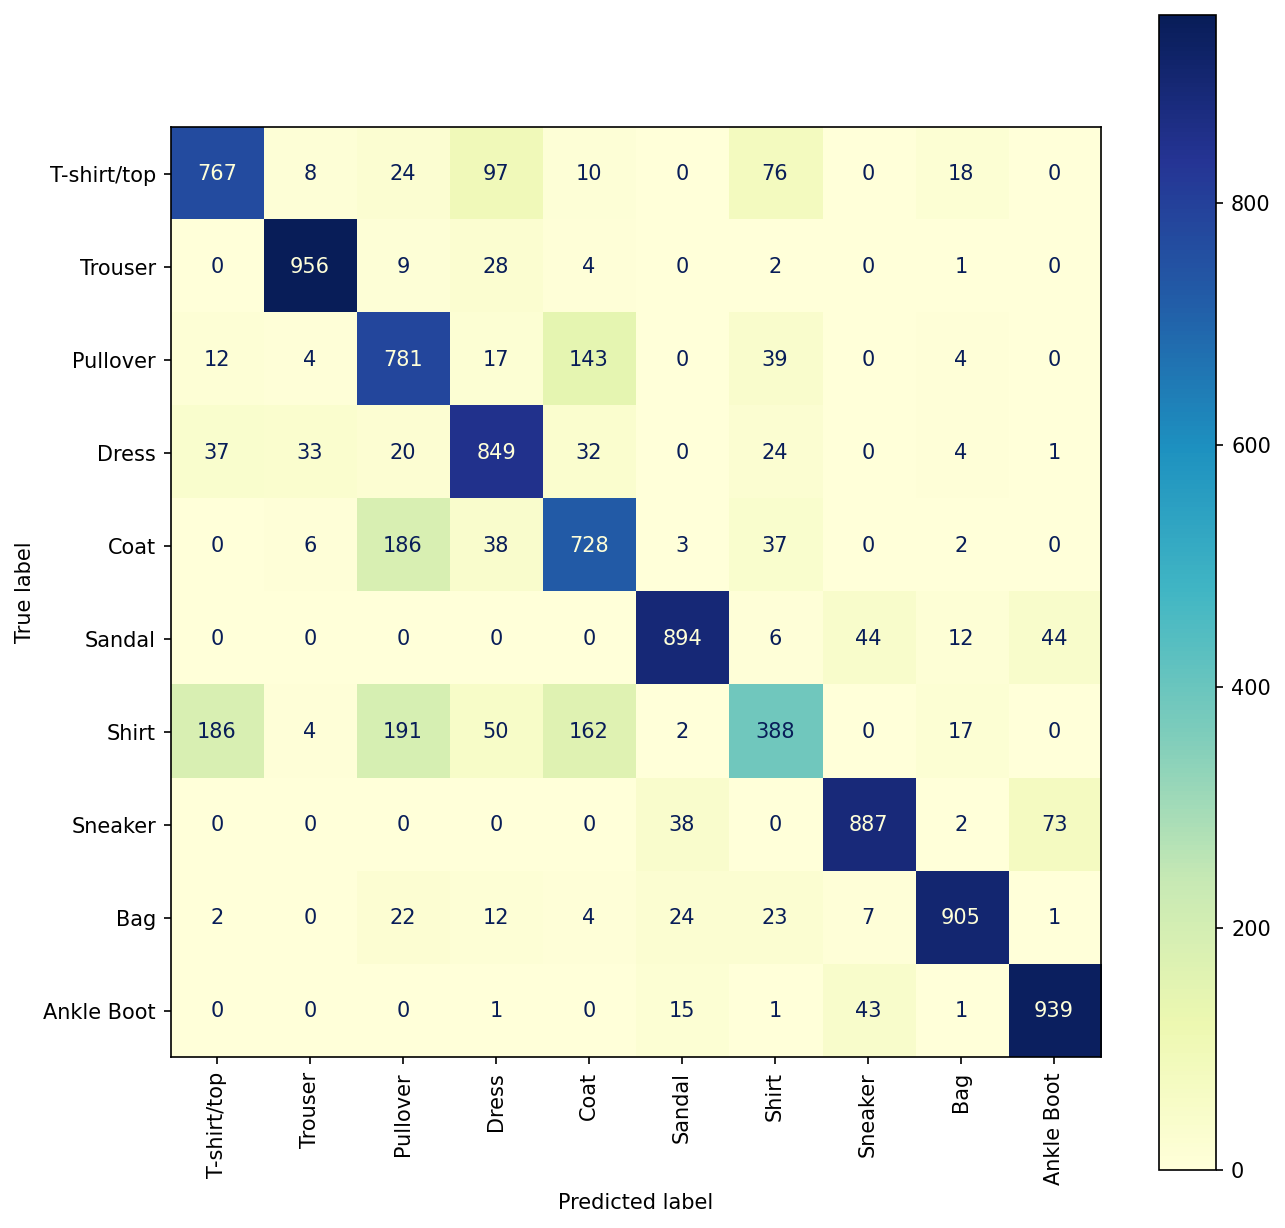

In [44]:
cm = confusion_matrix(y_true=test_labels, y_pred=y_preds)

fig, ax = plt.subplots(figsize=(10, 10))

ConfusionMatrixDisplay(cm, display_labels=class_names).plot(cmap=plt.cm.YlGnBu, xticks_rotation=90, ax=ax);

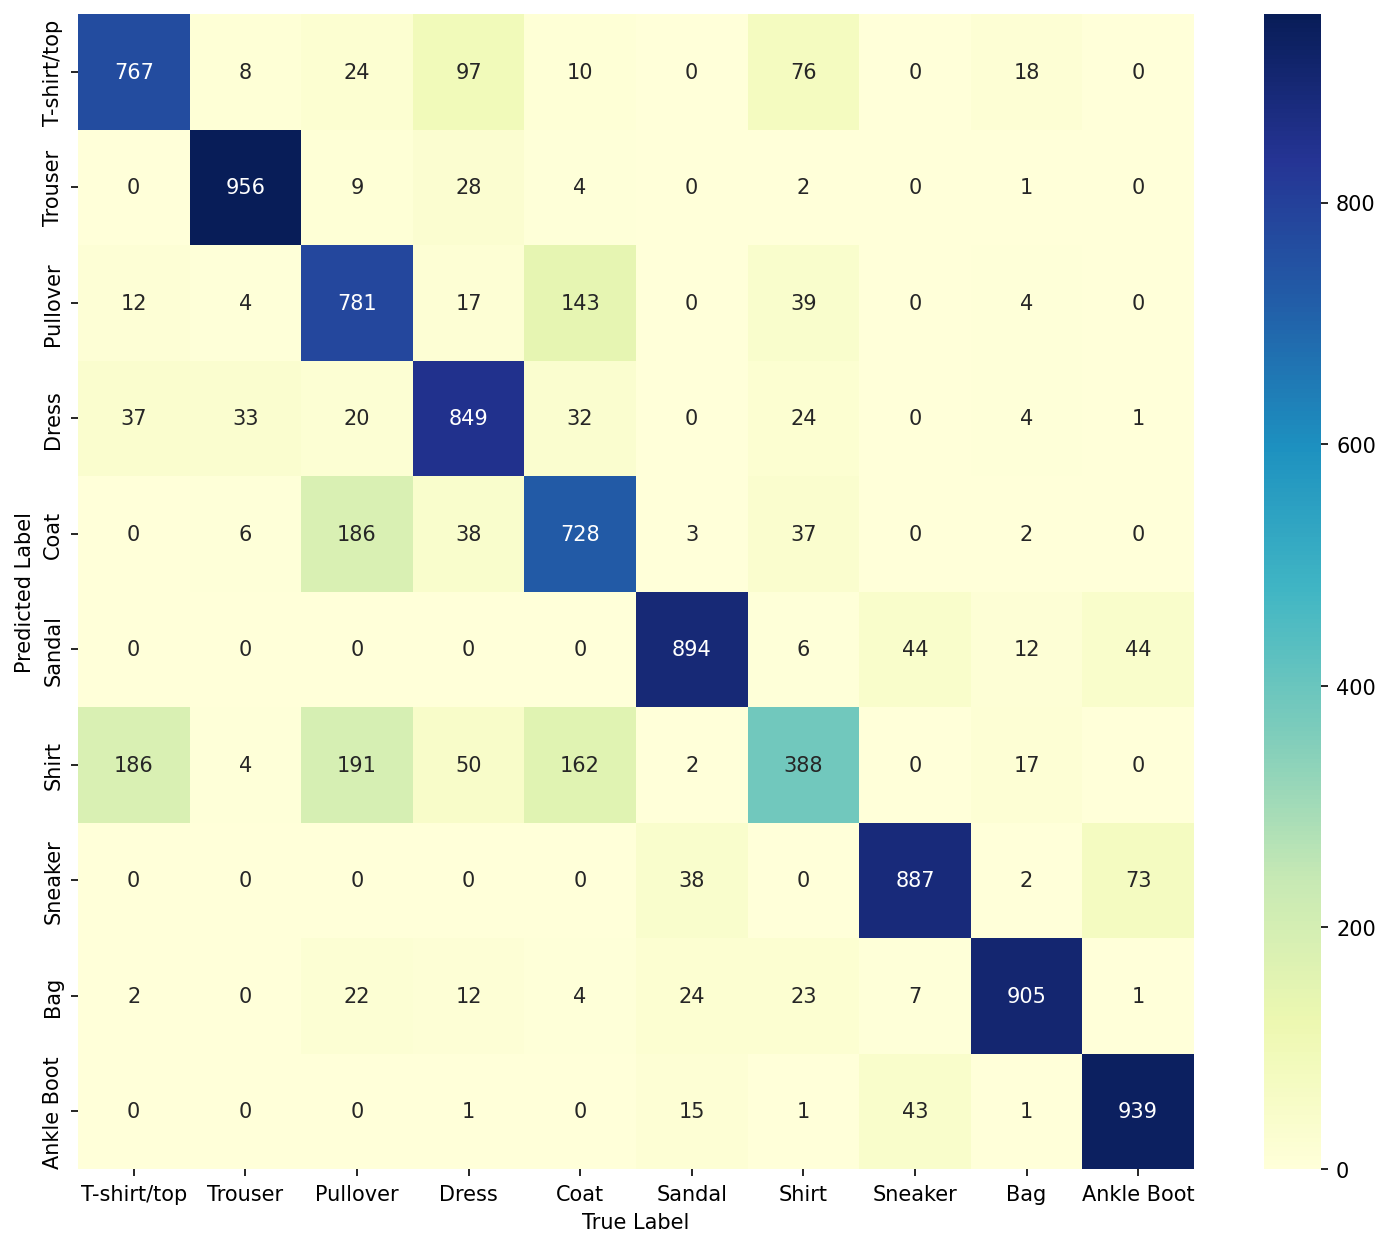

In [67]:
import seaborn as sns
fig, ax = plt.subplots(figsize=(12, 10))

s = sns.heatmap(cm, 
            annot=True, 
            cmap=plt.cm.YlGnBu, 
            ax=ax,fmt=".0f", 
            xticklabels=class_names, 
            yticklabels=class_names
)
s.set(xlabel="True Label", ylabel="Predicted Label");

#### Visualizing The Predictions Further...
Making a function for :
1. Plot a random image
2. Make prediction on said image
3. Label the plot with the truth label and predicted label

In [ ]:
import random

def plot_random_image(model, images, true_labels, class_names):
  """
  Picks a random image, plots it and labels it with predicted and true label
  """

  i = random.randint(0, len(images))
  
  target_image = images[i]
  pred_probs = model.predict(target_image.reshape(1, 28, 28))
  pred_label = class_names[pred_probs.argmax()]
  true_label = class_names[true_labels[i]]

  plt.imshow(target_image, cmap=plt.cm.binary)
  plt.xlabel("Pred : {pred_label} {tf.reduce_max():2.0f}")